In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('./Spotify_Song_Attributes.csv')
df.head()

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0


In [5]:
df.isna().sum()

trackName              0
artistName             0
msPlayed               0
genre               1500
danceability         550
energy               550
key                  550
loudness             550
mode                 550
speechiness          550
acousticness         550
instrumentalness     550
liveness             550
valence              550
tempo                550
type                 550
id                   550
uri                  550
track_href           550
analysis_url         550
duration_ms          550
time_signature       550
dtype: int64

In [7]:
top_5_artists=df.groupby('artistName').count().sort_values(by='trackName', ascending=False)['trackName'][:10]
top_5_artists

artistName
blackbear            128
Lauv                 100
Linkin Park           94
The Neighbourhood     86
Kato                  78
Lund                  78
Sonu Nigam            76
RADWIMPS              76
Low Roar              72
Vampire Weekend       68
Name: trackName, dtype: int64

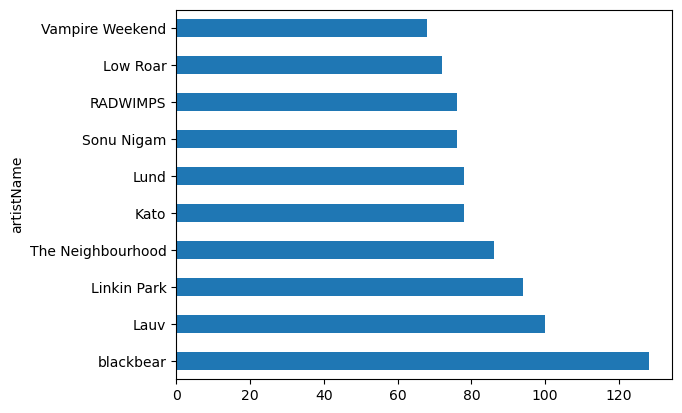

In [8]:
top_5_artists.plot.barh()
plt.show()

In [9]:
#top 5 loudest tracks
top_5_loudest_tracks = df[['loudness','trackName']].sort_values(by='loudness')
top_5_loudest_tracks

,loudness,trackName
8156,-42.044,Message from Home
3116,-42.044,Message from Home
4335,-39.219,Sylvia: Pizzicato
9375,-39.219,Sylvia: Pizzicato
5195,-38.793,Afraid of Time
...,...,...
10063,NaN,You're Always with Me
10064,NaN,You're Going Down
10065,NaN,You're Okay
10066,NaN,You're the One


In [10]:
top_artisit_with_dancebility_song=df[['danceability','trackName','artistName']].sort_values(by='danceability')[:5]
top_artisit_with_dancebility_song

,danceability,trackName,artistName
6621,0.0000,Do Not Go Gentle Into That Good Night,Hans Zimmer
1581,0.0000,Do Not Go Gentle Into That Good Night,Hans Zimmer
5564,0.0000,[Stef],Linkin Park
524,0.0000,[Stef],Linkin Park
3224,0.0631,Murph,Hans Zimmer


In [11]:
df.head()

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0


In [12]:
# Check if 'duration_ms' exists
if 'duration_ms' in df.columns:
    # Convert duration to seconds
    df['duration_sec'] = df['duration_ms'] / 1000
else:
    print("Column 'duration_ms' is missing from the dataset.")
    # If duration_ms is missing, use an alternative approach or skip this step

# Display the first few rows to verify
print(df.head())

                                           trackName  \
0                                           "Honest"   
1  "In The Hall Of The Mountain King" from Peer G...   
2                                 #BrooklynBloodPop!   
3                                                $10   
4                         (I Just) Died In Your Arms   

                  artistName  msPlayed              genre  danceability  \
0               Nico Collins    191772                NaN         0.476   
1  London Symphony Orchestra   1806234  british orchestra         0.475   
2                       SyKo    145610         glitchcore         0.691   
3               Good Morning     25058   experimental pop         0.624   
4               Cutting Crew   5504949         album rock         0.625   

   energy   key  loudness  mode  speechiness  ...  valence    tempo  \
0   0.799   4.0    -4.939   0.0       0.2120  ...    0.577  162.139   
1   0.130   7.0   -17.719   1.0       0.0510  ...    0.122  112.241   

In [13]:
print(df.columns)

Index(['trackName', 'artistName', 'msPlayed', 'genre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature',
       'duration_sec'],
      dtype='object')


In [14]:
# Generate features like average play count per user and artist popularity
# Placeholder code as actual columns might not exist

# For demonstration, creating random popularity scores
import numpy as np
df['artist_popularity'] = np.random.randint(1, 100, df.shape[0])

# Drop irrelevant columns
columns_to_drop = ['track_href', 'analysis_url']
df = df.drop(columns=columns_to_drop, errors='ignore')

# Display the first few rows of the processed DataFrame
print(df.head())

                                           trackName  \
0                                           "Honest"   
1  "In The Hall Of The Mountain King" from Peer G...   
2                                 #BrooklynBloodPop!   
3                                                $10   
4                         (I Just) Died In Your Arms   

                  artistName  msPlayed              genre  danceability  \
0               Nico Collins    191772                NaN         0.476   
1  London Symphony Orchestra   1806234  british orchestra         0.475   
2                       SyKo    145610         glitchcore         0.691   
3               Good Morning     25058   experimental pop         0.624   
4               Cutting Crew   5504949         album rock         0.625   

   energy   key  loudness  mode  speechiness  ...  liveness  valence    tempo  \
0   0.799   4.0    -4.939   0.0       0.2120  ...    0.2570    0.577  162.139   
1   0.130   7.0   -17.719   1.0       0.0510  ... 

In [20]:
# Placeholder for repeated plays (1 for repeated play, 0 for not)
df['repeated_play'] = 0

# Display the first few rows to verify
print(df[['trackName', 'artistName', 'repeated_play']].head())

                                           trackName  \
0                                           "Honest"   
1  "In The Hall Of The Mountain King" from Peer G...   
2                                 #BrooklynBloodPop!   
3                                                $10   
4                         (I Just) Died In Your Arms   

                  artistName  repeated_play  
0               Nico Collins              0  
1  London Symphony Orchestra              0  
2                       SyKo              0  
3               Good Morning              0  
4               Cutting Crew              0  


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='mean')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['genre'], drop_first=True)

# Define features and labels
X = df.drop(columns=['repeated_play', 'trackName', 'artistName', 'uri', 'type', 'id'])
y = df['repeated_play']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2016

    accuracy                           1.00      2016
   macro avg       1.00      1.00      1.00      2016
weighted avg       1.00      1.00      1.00      2016



In [22]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2016

    accuracy                           1.00      2016
   macro avg       1.00      1.00      1.00      2016
weighted avg       1.00      1.00      1.00      2016

Confusion Matrix:
[[2016]]


In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator for predictions
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Evaluate the tuned model
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))
print("Tuned Model Classification Report:")
print(classification_report(y_test, y_pred))
print("Tuned Model Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 1.0
Tuned Model Accuracy: 1.0
Tuned Model Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2016

    accuracy                           1.00      2016
   macro avg       1.00      1.00      1.00      2016
weighted avg       1.00      1.00      1.00      2016

Tuned Model Confusion Matrix:
[[2016]]


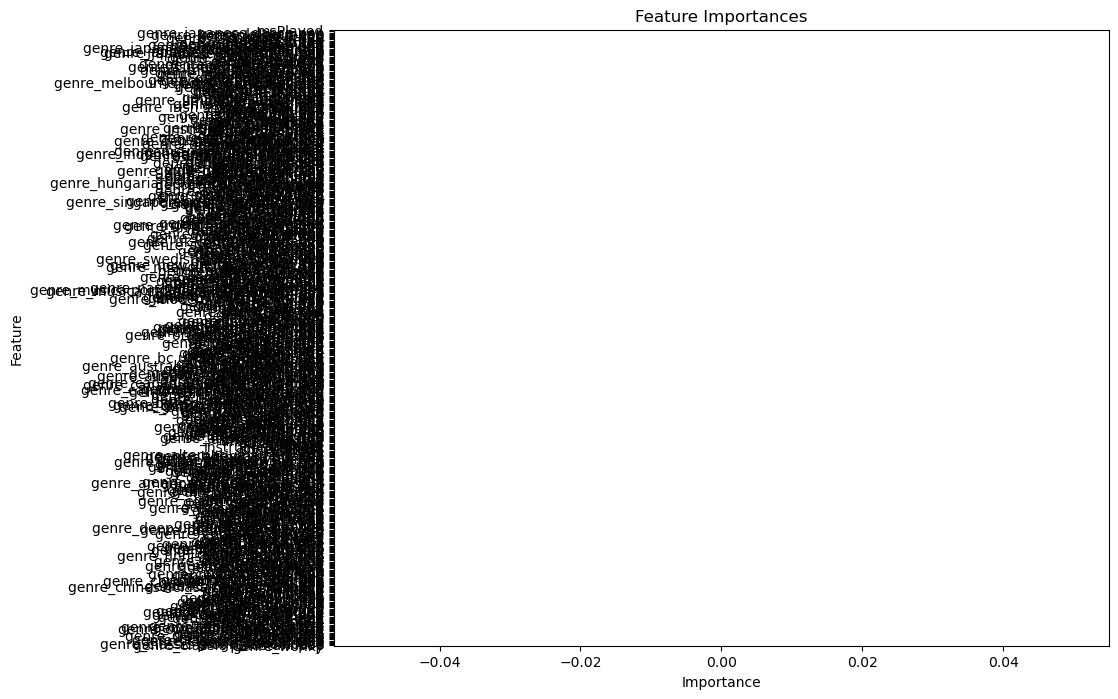

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the best estimator
importances = best_clf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


In [39]:
#save the model
import joblib

# Save the model
joblib.dump(clf, 'spotify_recommendation_model.pkl')

# Load the model (for future use)
#model = joblib.load('spotify_recommendation_model.pkl')


['spotify_recommendation_model.pkl']

In [1]:
# import joblib
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np
# from sklearn.impute import SimpleImputer

# # Load your dataset
# df = pd.read_csv('./Spotify_Song_Attributes.csv')

# # Create 'repeated_play' column with random data for simulation
# np.random.seed(42)  # for reproducibility
# df['repeated_play'] = np.random.choice([0, 1], size=len(df), p=[0.8, 0.2])

# # Convert duration from milliseconds to seconds
# df['duration_sec'] = df['duration_ms'] / 1000

# # Drop columns that won't be used for training
# df = df.drop(columns=['trackName', 'artistName', 'uri', 'type', 'id', 'track_href', 'analysis_url'])

# # One-hot encode the 'genre' column
# df = pd.get_dummies(df, columns=['genre'], drop_first=True)

# # Handle missing values using SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# # Define features and labels
# X = df_imputed.drop(columns=['repeated_play'])
# y = df_imputed['repeated_play']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a Random Forest Classifier
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Save the trained model
# joblib.dump(model, 'spotify_recommendation_model.pkl')

# print("Model saved successfully.")


import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Load your dataset
df = pd.read_csv('./Spotify_Song_Attributes.csv')

# Create 'repeated_play' column with random data for simulation
np.random.seed(42)  # for reproducibility
df['repeated_play'] = np.random.choice([0, 1], size=len(df), p=[0.8, 0.2])

# Convert duration from milliseconds to seconds
df['duration_sec'] = df['duration_ms'] / 1000

# Drop columns that won't be used for training
df = df.drop(columns=['trackName', 'artistName', 'uri', 'type', 'id', 'track_href', 'analysis_url'])

# One-hot encode the 'genre' column
df = pd.get_dummies(df, columns=['genre'], drop_first=True)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Define features and labels
X = df_imputed.drop(columns=['repeated_play'])
y = df_imputed['repeated_play']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the trained model using pickle
with open('spotify_recommendation_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved successfully.")



Model saved successfully.


In [2]:
df.head()

,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,genre_vapor pop,genre_vapor twitch,genre_video game music,genre_viral pop,genre_viral rap,genre_virginia indie,genre_vocal trance,genre_wave,genre_weirdcore,genre_wonky
0,191772,0.476,0.799,4.0,-4.939,0.0,0.2120,0.0162,0.000000,0.2570,...,False,False,False,False,False,False,False,False,False,False
1,1806234,0.475,0.130,7.0,-17.719,1.0,0.0510,0.9160,0.956000,0.1010,...,False,False,False,False,False,False,False,False,False,False
2,145610,0.691,0.814,1.0,-3.788,0.0,0.1170,0.0164,0.000000,0.3660,...,False,False,False,False,False,False,False,False,False,False
3,25058,0.624,0.596,4.0,-9.804,1.0,0.0314,0.4750,0.203000,0.1190,...,False,False,False,False,False,False,False,False,False,False
4,5504949,0.625,0.726,11.0,-11.402,0.0,0.0444,0.0158,0.000169,0.0625,...,False,False,False,False,False,False,False,False,False,False
